Versione2 del codice in cui non uso le configurazioni post equilibrazione ma solo metto come T iniziale quella che so porterà alla temperatura target

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics 
from scipy.stats import norm 
from scipy.stats import chi2
from scipy.stats import cauchy

## Stato solido

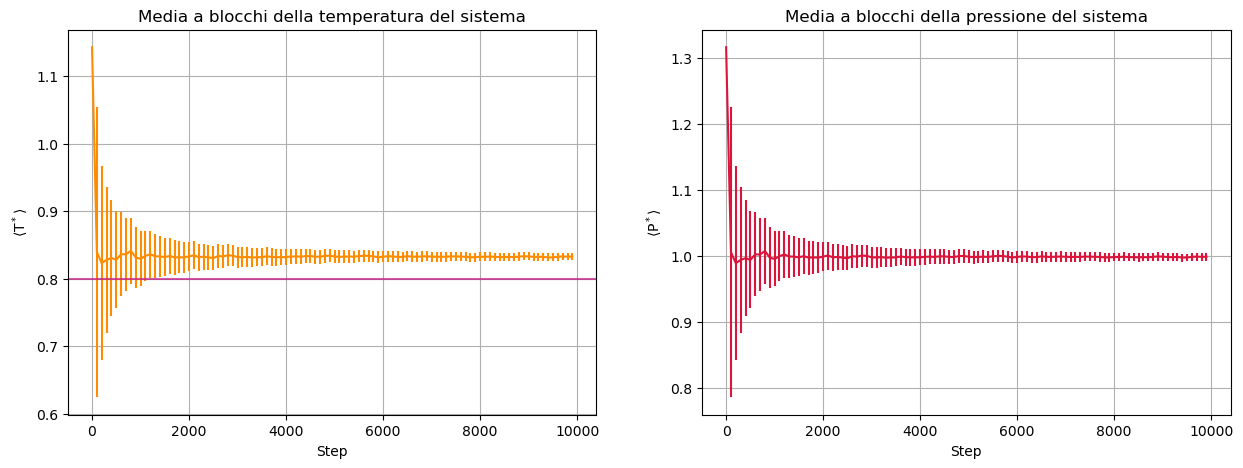

In [2]:
Ntot=10000
Nblock=100  #numero blocchi simulazione
xblocks=np.arange(Nblock)*(Ntot/Nblock)+1  #sulle ascisse numero step corrispondenti al blocco in esame

solTemps, solTempErrs=np.loadtxt("Versione2/SolidState/temperature.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
solPress, solPresErrs=np.loadtxt("Versione2/SolidState/pressure.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

sbfig ,(sbplt1, sbplt2) = plt.subplots(1, 2, figsize=(15, 5))

sbplt1.errorbar(xblocks, solTemps, yerr=solTempErrs, color="darkorange")
sbplt1.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
sbplt1.set_xlabel("Step")
sbplt1.set_ylabel(r"$\left<\mathrm{T^*}\right>$")
sbplt1.set_title("Media a blocchi della temperatura del sistema")
sbplt1.grid(True)

sbplt2.errorbar(xblocks, solPress, yerr=solPresErrs, color="crimson")
sbplt2.set_xlabel("Step")
sbplt2.set_ylabel(r"$\left<\mathrm{P^*}\right>$")
sbplt2.set_title("Media a blocchi della pressione del sistema")
sbplt2.grid(True)

plt.show()

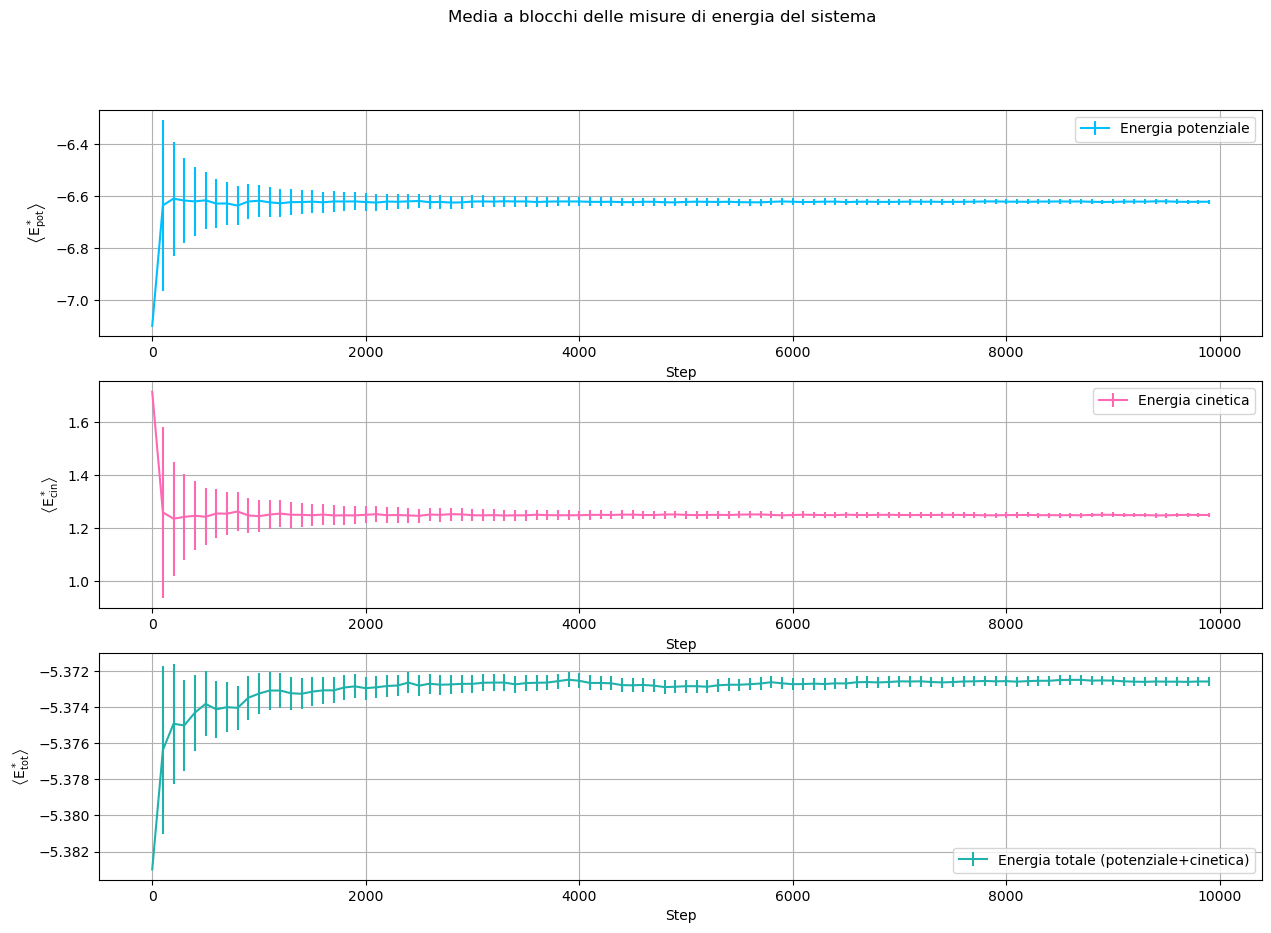

In [3]:
solPens, solPenErrs=np.loadtxt("Versione2/SolidState/potential_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
solKens, solKenErrs=np.loadtxt("Versione2/SolidState/kinetic_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
solTens, solTenErrs=np.loadtxt("Versione2/SolidState/total_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

sefig ,(seplt1, seplt2, seplt3) = plt.subplots(3, 1, figsize=(15, 10))

seplt1.errorbar(xblocks, solPens, yerr=solPenErrs, label="Energia potenziale", color="deepskyblue")
seplt1.set_xlabel("Step")
seplt1.set_ylabel(r"$\left<\mathrm{E_{pot}^*}\right>$")
seplt1.legend()
seplt1.grid(True)

seplt2.errorbar(xblocks, solKens, yerr=solKenErrs, label="Energia cinetica", color="hotpink")
seplt2.set_xlabel("Step")
seplt2.set_ylabel(r"$\left<\mathrm{E_{cin}^*}\right>$")
seplt2.legend()
seplt2.grid(True)

seplt3.errorbar(xblocks, solTens, yerr=solTenErrs, label="Energia totale (potenziale+cinetica)", color="lightseagreen")
seplt3.set_xlabel("Step")
seplt3.set_ylabel(r"$\left<\mathrm{E_{tot}^*}\right>$")
seplt3.legend()
seplt3.grid(True)

sefig.suptitle("Media a blocchi delle misure di energia del sistema")
plt.show()

## Stato liquido

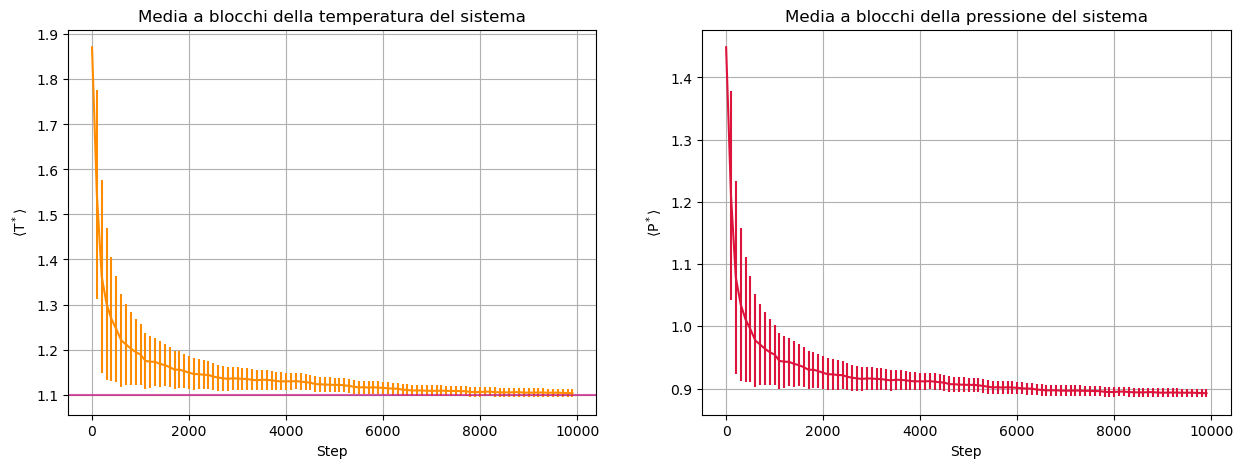

In [4]:
liqTemps, liqTempErrs=np.loadtxt("Versione2/LiquidState/temperature.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
liqPress, liqPresErrs=np.loadtxt("Versione2/LiquidState/pressure.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

lbfig ,(lbplt1, lbplt2) = plt.subplots(1, 2, figsize=(15, 5))

lbplt1.errorbar(xblocks, liqTemps, yerr=liqTempErrs, color="darkorange")
lbplt1.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lbplt1.set_xlabel("Step")
lbplt1.set_ylabel(r"$\left<\mathrm{T^*}\right>$")
lbplt1.set_title("Media a blocchi della temperatura del sistema")
lbplt1.grid(True)

lbplt2.errorbar(xblocks, liqPress, yerr=liqPresErrs, color="crimson")
lbplt2.set_xlabel("Step")
lbplt2.set_ylabel(r"$\left<\mathrm{P^*}\right>$")
lbplt2.set_title("Media a blocchi della pressione del sistema")
lbplt2.grid(True)

plt.show()

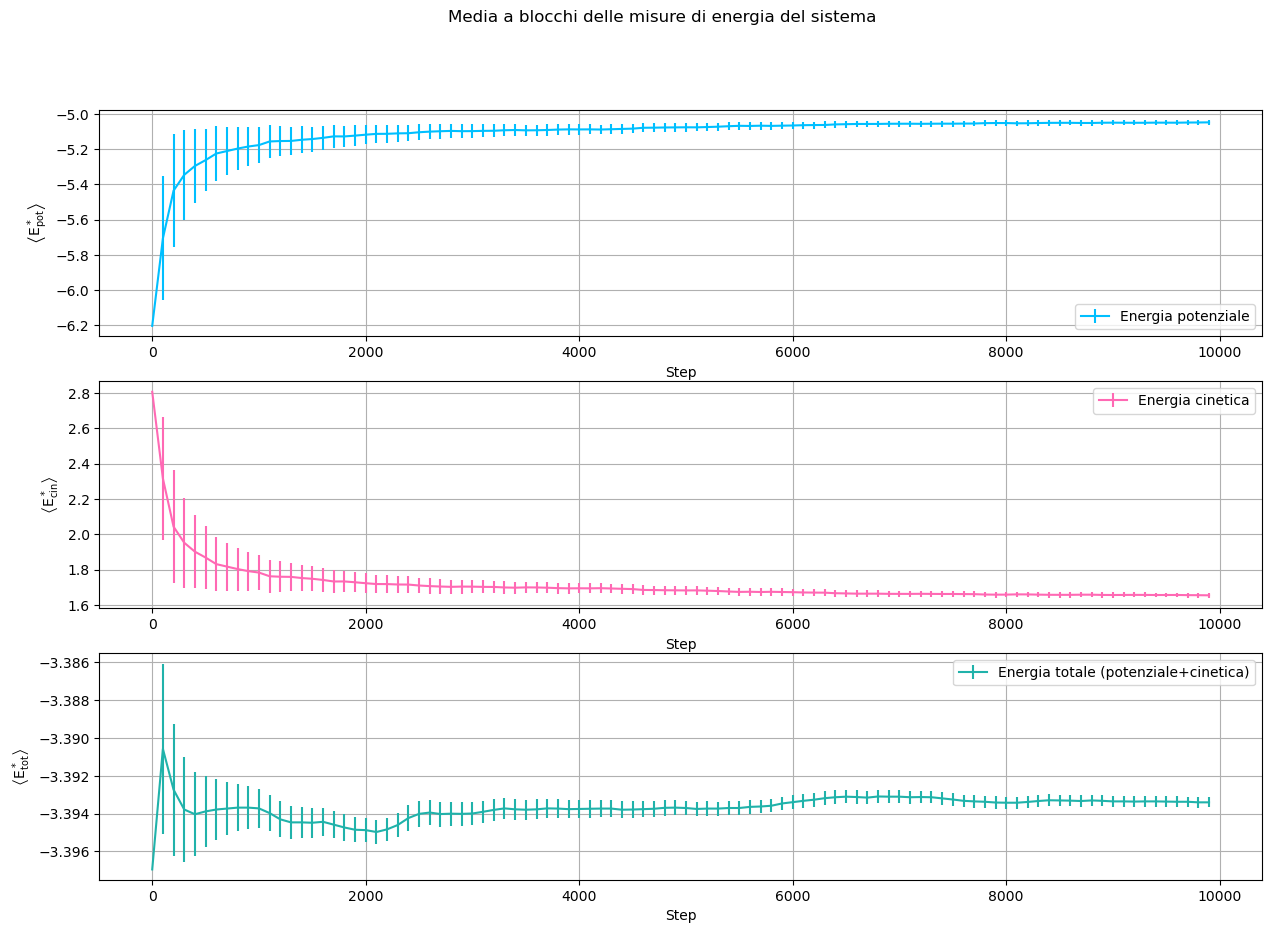

In [5]:
liqPens, liqPenErrs=np.loadtxt("Versione2/LiquidState/potential_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
liqKens, liqKenErrs=np.loadtxt("Versione2/LiquidState/kinetic_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
liqTens, liqTenErrs=np.loadtxt("Versione2/LiquidState/total_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

lefig ,(leplt1, leplt2, leplt3) = plt.subplots(3, 1, figsize=(15, 10))

leplt1.errorbar(xblocks, liqPens, yerr=liqPenErrs, label="Energia potenziale", color="deepskyblue")
leplt1.set_xlabel("Step")
leplt1.set_ylabel(r"$\left<\mathrm{E_{pot}^*}\right>$")
leplt1.legend()
leplt1.grid(True)

leplt2.errorbar(xblocks, liqKens, yerr=liqKenErrs, label="Energia cinetica", color="hotpink")
leplt2.set_xlabel("Step")
leplt2.set_ylabel(r"$\left<\mathrm{E_{cin}^*}\right>$")
leplt2.legend()
leplt2.grid(True)

leplt3.errorbar(xblocks, liqTens, yerr=liqTenErrs, label="Energia totale (potenziale+cinetica)", color="lightseagreen")
leplt3.set_xlabel("Step")
leplt3.set_ylabel(r"$\left<\mathrm{E_{tot}^*}\right>$")
leplt3.legend()
leplt3.grid(True)

lefig.suptitle("Media a blocchi delle misure di energia del sistema")
plt.show()

## Stato gassoso

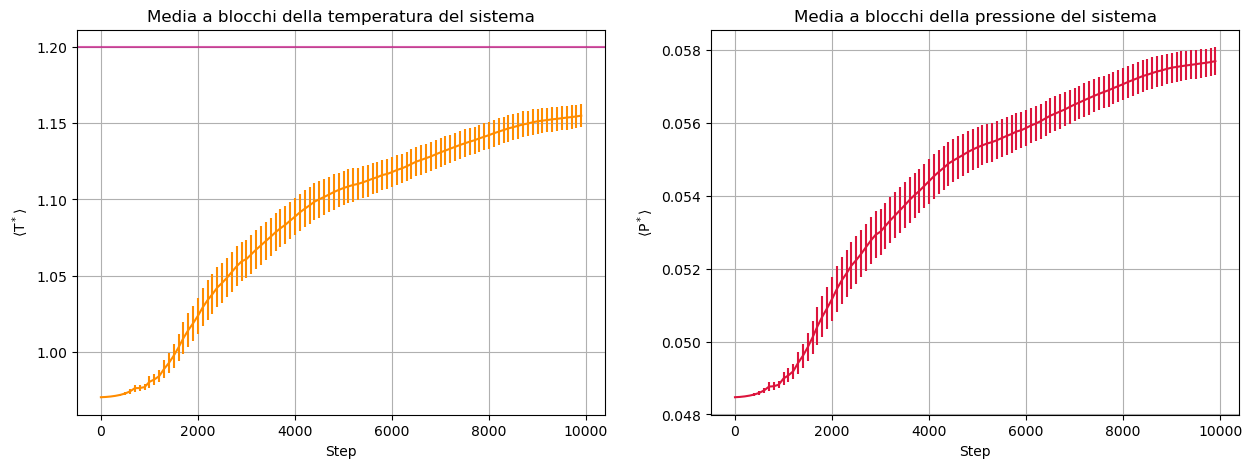

In [6]:
gasTemps, gasTempErrs=np.loadtxt("Versione2/GasState/temperature.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
gasPress, gasPresErrs=np.loadtxt("Versione2/GasState/pressure.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

gbfig ,(gbplt1, gbplt2) = plt.subplots(1, 2, figsize=(15, 5))

gbplt1.errorbar(xblocks, gasTemps, yerr=gasTempErrs, color="darkorange")
gbplt1.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gbplt1.set_xlabel("Step")
gbplt1.set_ylabel(r"$\left<\mathrm{T^*}\right>$")
gbplt1.set_title("Media a blocchi della temperatura del sistema")
gbplt1.grid(True)

gbplt2.errorbar(xblocks, gasPress, yerr=gasPresErrs, color="crimson")
gbplt2.set_xlabel("Step")
gbplt2.set_ylabel(r"$\left<\mathrm{P^*}\right>$")
gbplt2.set_title("Media a blocchi della pressione del sistema")
gbplt2.grid(True)

plt.show()

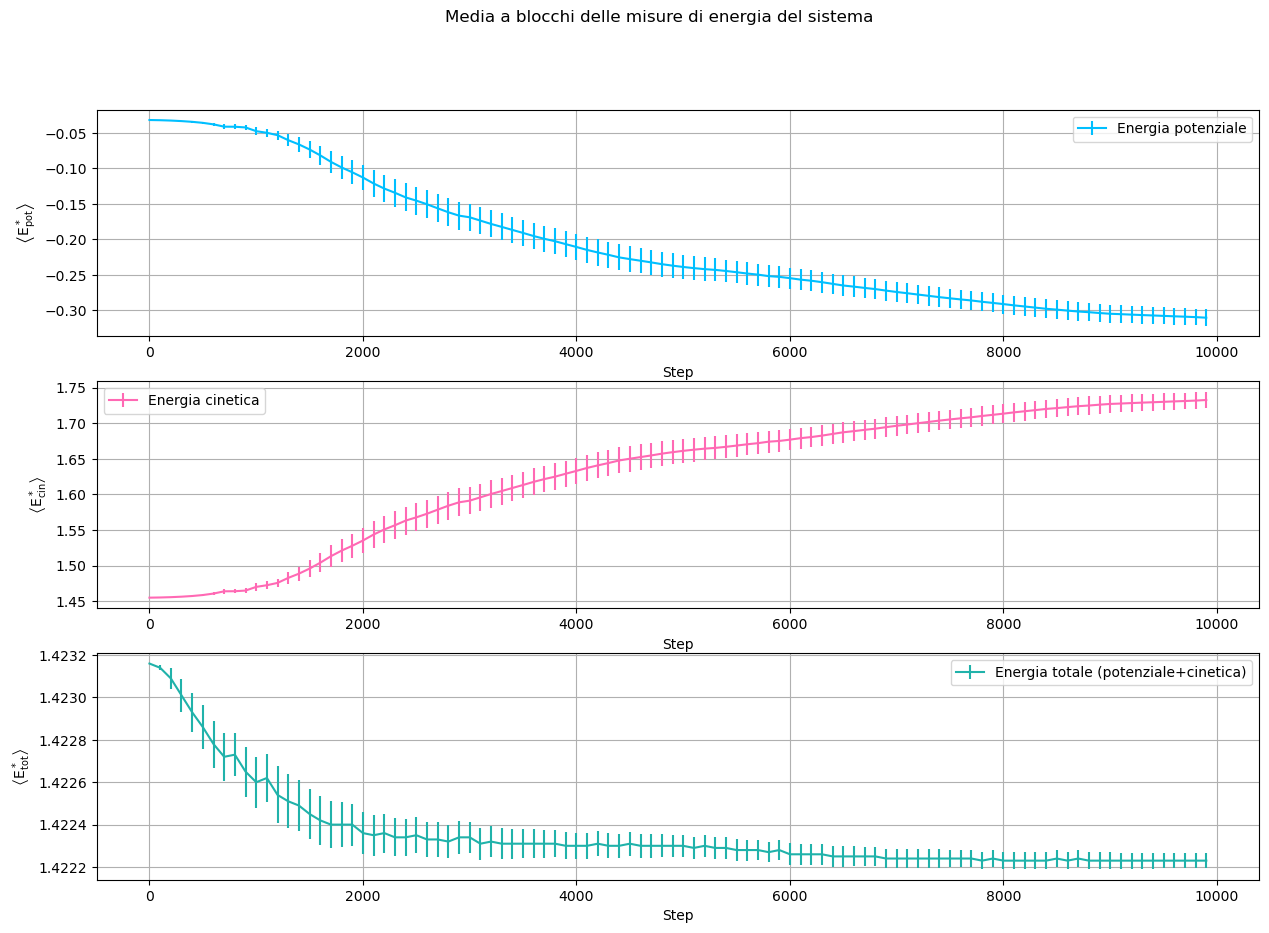

In [7]:
gasPens, gasPenErrs=np.loadtxt("Versione2/GasState/potential_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
gasKens, gasKenErrs=np.loadtxt("Versione2/GasState/kinetic_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
gasTens, gasTenErrs=np.loadtxt("Versione2/GasState/total_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

gefig ,(geplt1, geplt2, geplt3) = plt.subplots(3, 1, figsize=(15, 10))

geplt1.errorbar(xblocks, gasPens, yerr=gasPenErrs, label="Energia potenziale", color="deepskyblue")
geplt1.set_xlabel("Step")
geplt1.set_ylabel(r"$\left<\mathrm{E_{pot}^*}\right>$")
geplt1.legend()
geplt1.grid(True)

geplt2.errorbar(xblocks, gasKens, yerr=gasKenErrs, label="Energia cinetica", color="hotpink")
geplt2.set_xlabel("Step")
geplt2.set_ylabel(r"$\left<\mathrm{E_{cin}^*}\right>$")
geplt2.legend()
geplt2.grid(True)

geplt3.errorbar(xblocks, gasTens, yerr=gasTenErrs, label="Energia totale (potenziale+cinetica)", color="lightseagreen")
geplt3.set_xlabel("Step")
geplt3.set_ylabel(r"$\left<\mathrm{E_{tot}^*}\right>$")
geplt3.legend()
geplt3.grid(True)

gefig.suptitle("Media a blocchi delle misure di energia del sistema")
plt.show()